In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#Market Interest rate
Risk_free_rate = 0.5
#we will consider monthly returns - and we want to calculate the annual return
Months_in_year = 12

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Beta from formula: 1.144032829043909
Beta from regression: 1.144032829043908
Expected return: 0.046747808442050676


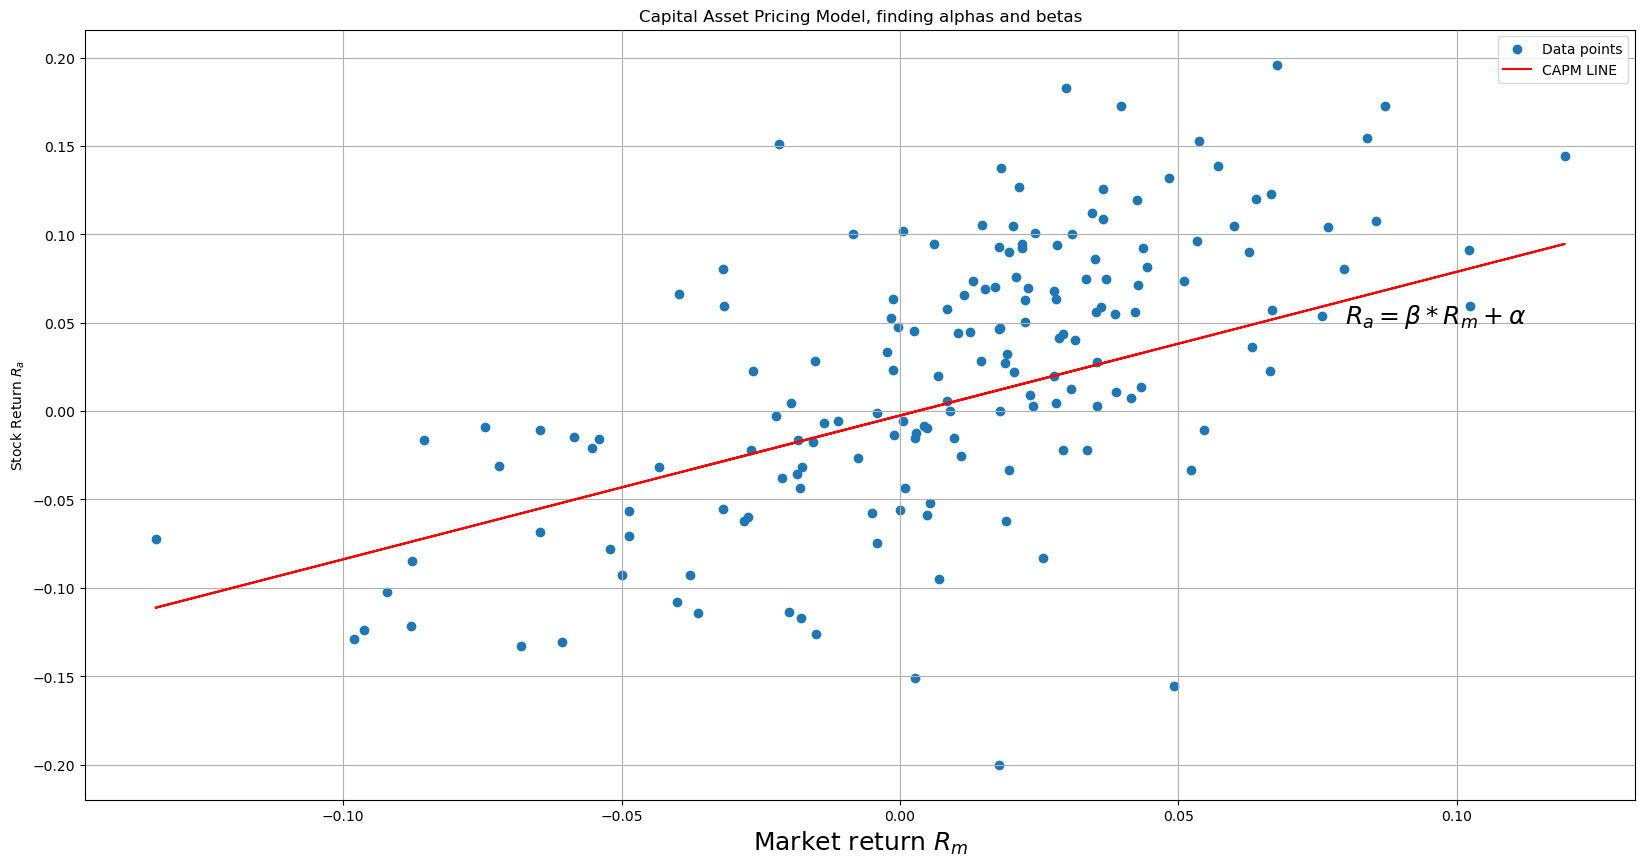

In [28]:
class CAPM:

    def __init__(self, stocks, start_date, end_date):
        self.data = None
        self.stocks = stocks
        self.start_date = start_date
        self.end_date = end_date


    def download_data(self):
        data= {}
        for stock in self.stocks:
            ticker = yf.download(stock, self.start_date, self.end_date)
            data[stock] = ticker["Adj Close"]
            #data[stock] = ticker["Adj Close"]
        return pd.DataFrame(data)

    def initialize(self):

        stock_data = self.download_data()
        
        #we use monthly return instead of daily returns
        stock_data = stock_data.resample("M").last()

        self.data = pd.DataFrame({"s_adjclose": stock_data[self.stocks[0]],
                                 "m_adjclose": stock_data[self.stocks[1]]})
        #logarithmic monthly returns
        self.data[["s_returns", "m_returns"]] = np.log(self.data[["s_adjclose", "m_adjclose"]]/
                                                       self.data[["s_adjclose", "m_adjclose"]].shift(1))

        #remove the NaN
        self.data = self.data[1:]
        
    def calculate_beta(self):
            # covariace matrix where the diagonal items are the variances
            # off diagonals are the covariances
            # the matrix is symmetric: cov[0,1] = cov[1,0]
            covariance_matrix = np.cov(self.data["s_returns"], self.data["m_returns"])
            #calculating beta acc to the formula
            beta = covariance_matrix[0,1] / covariance_matrix[1,1]
            print("Beta from formula:", beta)
    def regression(self):
        # using linear regression to fit a line to the data
        # [stock_returns, market_returns] - slope is the beta
        beta, alpha = np.polyfit(self.data["m_returns"], self.data["s_returns"], deg=1)
        print("Beta from regression:",beta)
        #calculate the expected return according to the CAPM formula
        #we are after annual return (this is why multipy by 12)
        expected_return = Risk_free_rate + beta * (self.data["m_returns"].mean() * Months_in_year - Risk_free_rate)

        print("Expected return:",expected_return)
        #self.plot_regression(alpha, beta)
        

    def plot_regression(self, alpha, beta):
        fig,axis = plt.subplots(1, figsize=(20, 10))
        axis.scatter(self.data["m_returns"], self.data["s_returns"], label = "Data points")                 
        axis.plot(self.data["m_returns"], beta * self.data["m_returns"] 
                  + alpha, color="red", label="CAPM LINE")
        plt.title("Capital Asset Pricing Model, finding alphas and betas" )
        plt.xlabel("Market return $R_m$", fontsize=18)
        plt.ylabel("Stock Return $R_a$")
        plt.text(0.08, 0.05, r'$R_a = \beta *R_m + \alpha$', fontsize = 18)
        plt.legend()
        plt.grid(True)
        plt.show()





if __name__ == "__main__":

    capm = CAPM(["AAPL", "^GSPC"], "2009-12-01","2024-01-01")
    capm.initialize()
    capm.calculate_beta()
    capm.regression()
    
    capm.plot_regression(alpha, beta)
        